# Algorithm Runtime Comparison

This notebook is used to generate the runtime comparison plot and table for the article.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
import timeit

In [3]:
# store the results here for plotting
results = {
    'Algorithm': [],
    'N': [],
    'Time (seconds)': [],
}

# here we define the algorithms of interest
algorithms = [
    'naiveMP',
    'stamp',
    'stomp',
    'scrimp_plus_plus',
]

# this is the window size that is kept at 4
m = 2**2

# compute timing results of all algorithms
# this is due to the fact that the naive algorithm performs HORRIBLY!
for algorithm in algorithms:
    for i in range(2, 14 + 1):
        n = 2**i
        setup = [
            'import numpy as np',
            'from matrixprofile import matrixProfile',
            'ts = np.random.uniform(size={})'.format(n),
            'm = {}'.format(m),
        ]
        setup_code = ';'.join(setup)
        
        runtime_code = 'matrixProfile.{}(ts, m)'.format(algorithm)
        
        # stamp's default does not compute the entire matrix profile so we make it happen
        if 'stamp' in algorithm:
            runtime_code = 'matrixProfile.{}(ts, m, sampling=1)'.format(algorithm)

        # shortcut to reduce long running naiveMP algorithm
        if 'naiveMP' == algorithm and i > 10:
            result = np.nan
        else:
            try:
                result = timeit.timeit(stmt=runtime_code, setup=setup_code, number=1)
            except ValueError:
                result = np.nan
        
        results['Algorithm'].append(algorithm)
        results['N'].append(n)
        results['Time (seconds)'].append(result)

In [4]:
df = pd.DataFrame(results)

In [5]:
df.pivot(index='N', columns='Algorithm', values='Time (seconds)')

Algorithm,naiveMP,scrimp_plus_plus,stamp,stomp
N,,,,
4,0.000248,NaN,0.019825,0.000430
8,0.001876,0.001665,0.001144,0.000809
16,0.014853,0.002983,0.002544,0.001576
32,0.065195,0.006451,0.005492,0.003250
64,0.260024,0.013720,0.010452,0.006089
128,1.080838,0.029260,0.024097,0.012694
256,4.671515,0.062151,0.052230,0.029099
512,18.586879,0.130727,0.105740,0.058693
1024,73.129341,0.278646,0.233594,0.123510


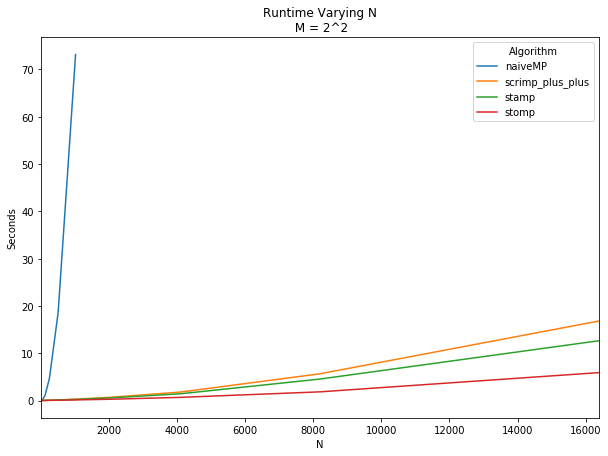

In [7]:
df.pivot(index='N', columns='Algorithm', values='Time (seconds)').plot(title='Runtime Varying N\n M = 2^2', figsize=(10,7))
plt.ylabel('Seconds')
plt.show()